In [3]:
# This R environment comes with many helpful analytics packages installed
# It is defined by the kaggle/rstats Docker image: https://github.com/kaggle/docker-rstats
# For example, here's a helpful package to load

library(readr)
library(dplyr)
library(ggplot2)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

list.files(path = "../input")

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

[1] "orange_1"

In [4]:
train<-read_csv("/kaggle/input/orange_1/train.csv",show_col_types = FALSE)
test<-read_csv("/kaggle/input/orange_1/test.csv",show_col_types = FALSE)

In [5]:
head(train)

company_name,industry,country,genai_tool,adoption_year,productivity_change_pct,employees_impacted,new_roles_created,training_hours,deployment_cost,employee_sentiment_score,automation_coverage_pct,voluntary_attritions,genai_role_salary,Client_Satisfaction_Post_GenAI
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Nelson, Bush and Wood Pvt. Ltd.",Technology,USA,ChatGPT,2023,14.79420,487,20,40.2,535791.5,6.87,66.3,46,149632.02,10
Marshall-Bolton Pvt. Ltd.,Entertainment,UK,LLaMA,2022,7.25755,449,17,33.0,459384.2,5.47,47.1,66,97781.05,10
"Craig, Walker and Perez Pvt. Ltd.",Healthcare,South Korea,ChatGPT,2022,14.56666,500,23,39.9,541500.7,6.70,64.4,41,87145.46,10
"Navarro, Higgins and Bowman Pvt. Ltd.",Entertainment,Brazil,ChatGPT,2023,14.84730,487,16,52.6,531076.8,8.25,62.6,49,48057.74,10
Curtis-Williams Pvt. Ltd.,Hospitality,South Africa,ChatGPT,2023,14.92499,451,20,37.8,522063.4,6.35,57.5,48,27567.03,10
Jackson-Dyer Pvt. Ltd.,Advertising,Singapore,Claude,2024,13.50224,437,14,40.6,505678.9,6.93,61.1,43,82568.56,10


## Task 1

#### Data Exploration and Preparation

You’ve received a new dataset for your upcoming project. Before diving into the main analysis, it's essential to assess the dataset’s consistency and prepare it for reliable and accurate results. Your task is to explore the data thoroughly and identify any potential issues that could impact your findings.

Evaluate the completeness and consistency of the data. Look for anomalies, any values or patterns that appear unusual or unexpected. Use appropriate visualizations to highlight these irregularities effectively.

Determine how to address these issues and clearly justify your approach. Your goal is to prepare a clean, reliable dataset that you can confidently use for analysis and modeling.

Data preprocessing is a critical phase—ensure your work is meticulous and well-documented, as it will serve as the foundation for all future tasks.

(1 point)

spc_tbl_ [75,000 × 15] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ company_name                  : chr [1:75000] "Nelson, Bush and Wood Pvt. Ltd." "Marshall-Bolton Pvt. Ltd." "Craig, Walker and Perez Pvt. Ltd." "Navarro, Higgins and Bowman Pvt. Ltd." ...
 $ industry                      : chr [1:75000] "Technology" "Entertainment" "Healthcare" "Entertainment" ...
 $ country                       : chr [1:75000] "USA" "UK" "South Korea" "Brazil" ...
 $ genai_tool                    : chr [1:75000] "ChatGPT" "LLaMA" "ChatGPT" "ChatGPT" ...
 $ adoption_year                 : num [1:75000] 2023 2022 2022 2023 2023 ...
 $ productivity_change_pct       : num [1:75000] 14.79 7.26 14.57 14.85 14.92 ...
 $ employees_impacted            : num [1:75000] 487 449 500 487 451 437 356 494 390 337 ...
 $ new_roles_created             : num [1:75000] 20 17 23 16 20 14 12 22 14 12 ...
 $ training_hours                : num [1:75000] 40.2 33 39.9 52.6 37.8 40.6 29 31.4 28.9 29.6 ...
 $ deployment_cost    

 company_name         industry           country           genai_tool       
 Length:75000       Length:75000       Length:75000       Length:75000      
 Class :character   Class :character   Class :character   Class :character  
 Mode  :character   Mode  :character   Mode  :character   Mode  :character  
                                                                            
                                                                            
                                                                            
                                                                            
 adoption_year  productivity_change_pct employees_impacted new_roles_created
 Min.   :2022   Min.   : 0.2154         Min.   :148.0      Min.   : 0.00    
 1st Qu.:2022   1st Qu.: 6.9880         1st Qu.:366.0      1st Qu.:13.00    
 Median :2023   Median : 8.9487         Median :413.0      Median :15.00    
 Mean   :2023   Mean   : 9.9513         Mean   :409.8      Mean   :15.38    

company_name,industry,country,genai_tool,adoption_year,productivity_change_pct,employees_impacted,new_roles_created,training_hours,deployment_cost,employee_sentiment_score,automation_coverage_pct,voluntary_attritions,genai_role_salary,Client_Satisfaction_Post_GenAI
<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
"Nelson, Bush and Wood Pvt. Ltd.",Technology,USA,ChatGPT,2023,14.79420,487,20,40.2,535791.5,6.87,66.3,46,149632.02,10
Marshall-Bolton Pvt. Ltd.,Entertainment,UK,LLaMA,2022,7.25755,449,17,33.0,459384.2,5.47,47.1,66,97781.05,10
"Craig, Walker and Perez Pvt. Ltd.",Healthcare,South Korea,ChatGPT,2022,14.56666,500,23,39.9,541500.7,6.70,64.4,41,87145.46,10
"Navarro, Higgins and Bowman Pvt. Ltd.",Entertainment,Brazil,ChatGPT,2023,14.84730,487,16,52.6,531076.8,8.25,62.6,49,48057.74,10
Curtis-Williams Pvt. Ltd.,Hospitality,South Africa,ChatGPT,2023,14.92499,451,20,37.8,522063.4,6.35,57.5,48,27567.03,10
Jackson-Dyer Pvt. Ltd.,Advertising,Singapore,Claude,2024,13.50224,437,14,40.6,505678.9,6.93,61.1,43,82568.56,10


company_name                       industry 
                             0                              0 
                       country                     genai_tool 
                             0                              0 
                 adoption_year        productivity_change_pct 
                          3472                              0 
            employees_impacted              new_roles_created 
                           259                              0 
                training_hours                deployment_cost 
                             0                              0 
      employee_sentiment_score        automation_coverage_pct 
                             0                              0 
          voluntary_attritions              genai_role_salary 
                          3750                           4702 
Client_Satisfaction_Post_GenAI 
                             0

[1] "Technology"     "Entertainment"  "Healthcare"     "Hospitality"   
 [5] "Advertising"    "Manufacturing"  "Retail"         "Utilities"     
 [9] "Defense"        "Transportation" "Education"      "Legal Services"
[13] "Finance"        "Telecom"

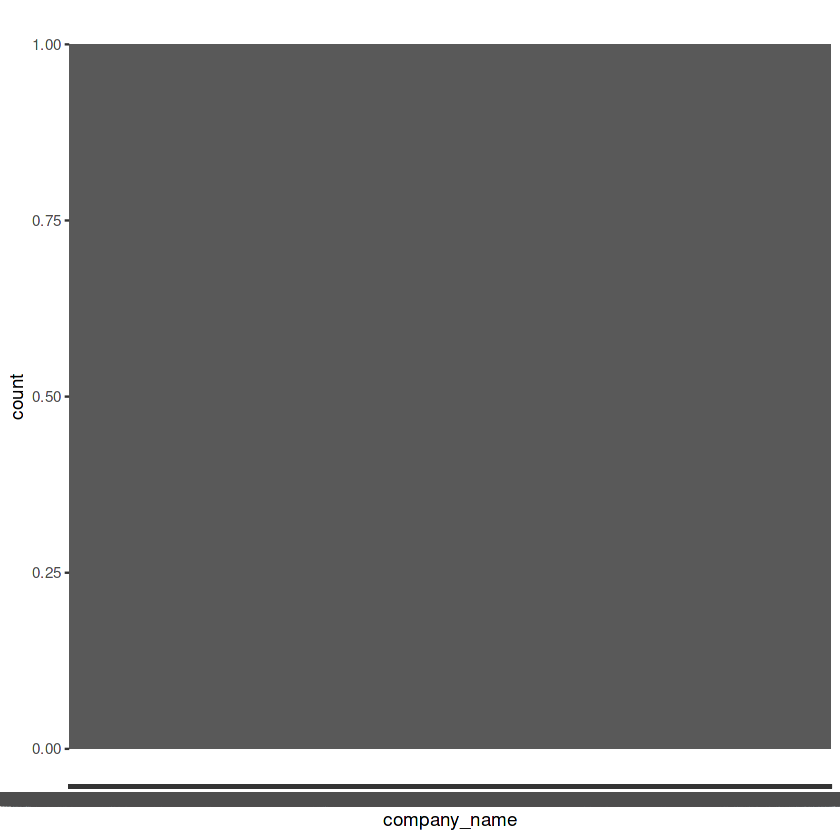

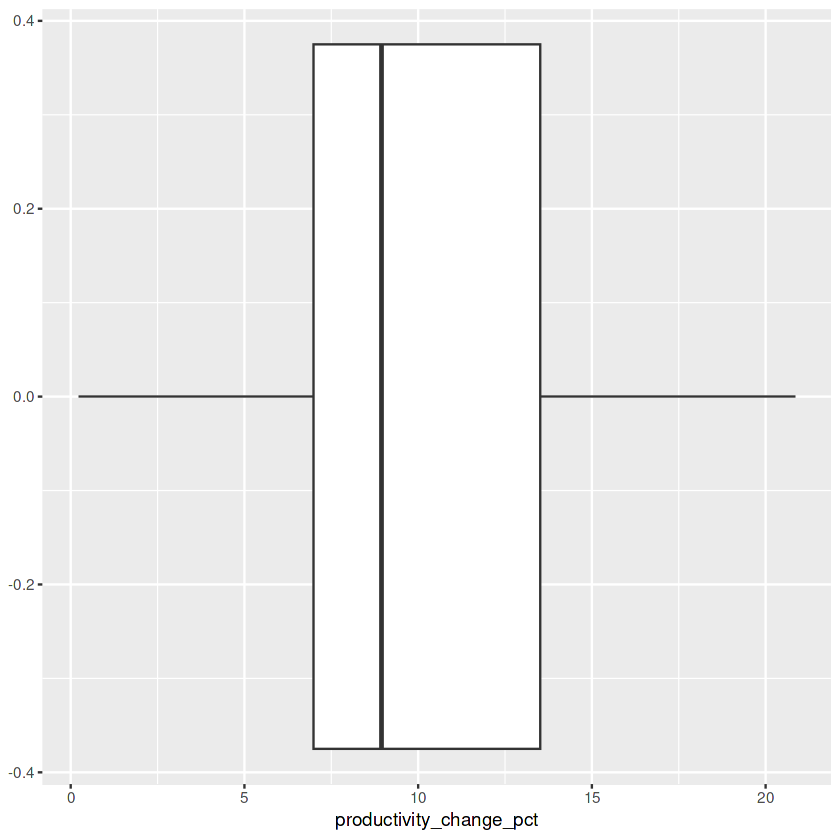

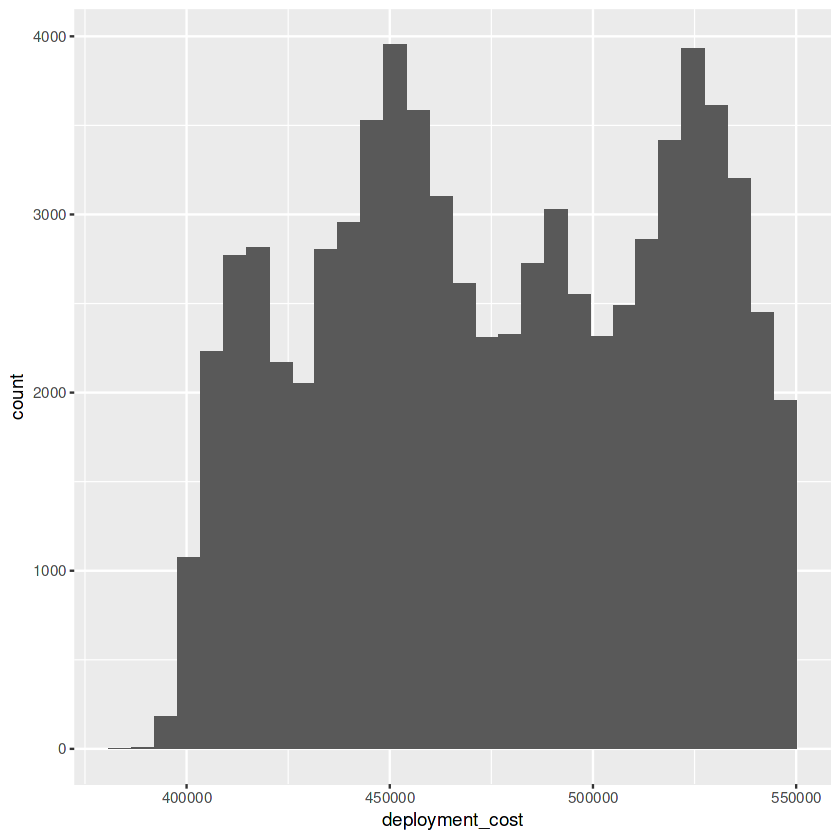

In [6]:
str(train)
glimpse(train)
summary(train)
head(train)

colSums(is.na(train))
library(ggplot2)
ggplot(train, aes(x = company_name)) + geom_bar() # Example visualization

unique(train$industry)
duplicated_rows <- train[duplicated(train), ]


ggplot(train, aes(x = productivity_change_pct)) + geom_boxplot()
ggplot(train, aes(x = deployment_cost)) + geom_histogram(bins=30)




Completeness and Missing Data
There are missing values in critical columns:

adoption_year (3,472 NAs)

employees_impacted (259 NAs)

voluntary_attritions (3,750 NAs)

genai_role_salary (4,702 NAs)

All categorical columns (company_name, industry, country, genai_tool) are complete with no missing values.

Consistency, Unusual Patterns, and Outliers
Boxplot for productivity_change_pct indicates a tight middle range and some values at extremes (possible outliers or skew).

Histogram of deployment_cost shows a multimodal distribution — indicating variability or potential group effects in cost structures.

Categorical industry values present a diverse but expected set (“Technology”, “Entertainment”, etc.), suggesting no immediate labeling problems.

No duplicate company records detected, enhancing data reliability on entity uniqueness.

Visualizations and Anomalies
Bar chart for company_name confirms high cardinality with many unique companies (dense or unreadable plot, typical for such a column).

Numerical columns visualized (boxplot, histogram) help spot any abnormal values or data entry errors.

Next Steps for Data Cleaning
Impute or drop missing values in critical analysis columns (e.g., use median for genai_role_salary, examine causes for missing adoption_year).

Consider transforming or winsorizing distributions in columns with clear outliers, like productivity_change_pct.

Document each cleaning action for reproducibility, including code comments and summary statistics before/after cleaning.

Handling Missing Values
Imputation: For columns with missing values like genai_role_salary and voluntary_attritions, use median imputation. The median is robust to outliers and appropriate when data is skewed.

For adoption_year: Since this is a key temporal variable, try to impute missing values using the mode or nearest neighbor imputation if possible; otherwise, drop rows with missing adoption_year if they are not numerous enough to impact the dataset significantly (about 4.6% missing).

For employees_impacted: Impute missing values similarly using median or mean based on distribution analysis. This is important as it affects workforce impact assessment.

Justification: Imputation maintains dataset size and leverages existing data patterns without introducing bias inherent in mean imputation for skewed data.

Addressing Outliers and Distributions
For productivity_change_pct and deployment_cost, where outliers or multimodal distributions appear:

Use visualization to identify and understand outliers.

Apply transformations (e.g., log transformation) to reduce skewness.

Winsorize extreme values if they distort model results but keep evidence-based justification.

Justification: Transformations improve model performance by normalizing distributions, and winsorization prevents undue influence of extreme values while retaining data integrity.

Consistency and Data Quality
Verify categorical variables (industry, genai_tool) for typos and standardize factor levels to ensure consistent categories.

Remove duplicate rows if found (none detected here).

Justification: Ensuring consistent categories and unique records eliminates noise and duplication, improving model interpretability and accuracy.

Documentation and Reproducibility
Document each data cleaning decision with code comments and summaries pre/post cleaning.

Save the cleaned dataset separately, ensuring clear version control for reproducibility.

Justification: This transparency builds trust and facilitates collaboration in data science workflows.



## Task 2

#### Data Driven Decisions and Analysis

Your company wants to adopt a Generative AI-Tool to speed up and automate certain tasks. Your task now is to: 
- Conduct a thorough exploration of the relationships between all relevant variables in the dataset.
- Develop **TWO** additional metrics which can provide some interesting insights into the success of the Gen AI tools in various sectors. Explain your findings. (Hint: Try to quantify how valuable the investment in Gen AI is)
- Utilize appropriate visualization techniques to represent your findings.

As you analyze the data try doing the following to understand the data better:
- What overall trends and anomalies do you notice when examining the relationships between different variables?
- Consider all variables and their effects in collaboration while making your decision.
- Think of multiple data backed use cases that your company can pursue.


Remember, the goal is to provide actionable insights that can inform data-driven decision-making at your company.

(1 point)

Warning message:
“Removed 3472 rows containing non-finite outside the scale range
(`stat_density()`).”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 3472 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 3472 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 3472 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 3472 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 3472 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 3472 rows containing missing values”
Warning message in ggally_statistic(data = data, mapping = mapping, na.rm = na.rm, :
“Removed 3472 rows contain

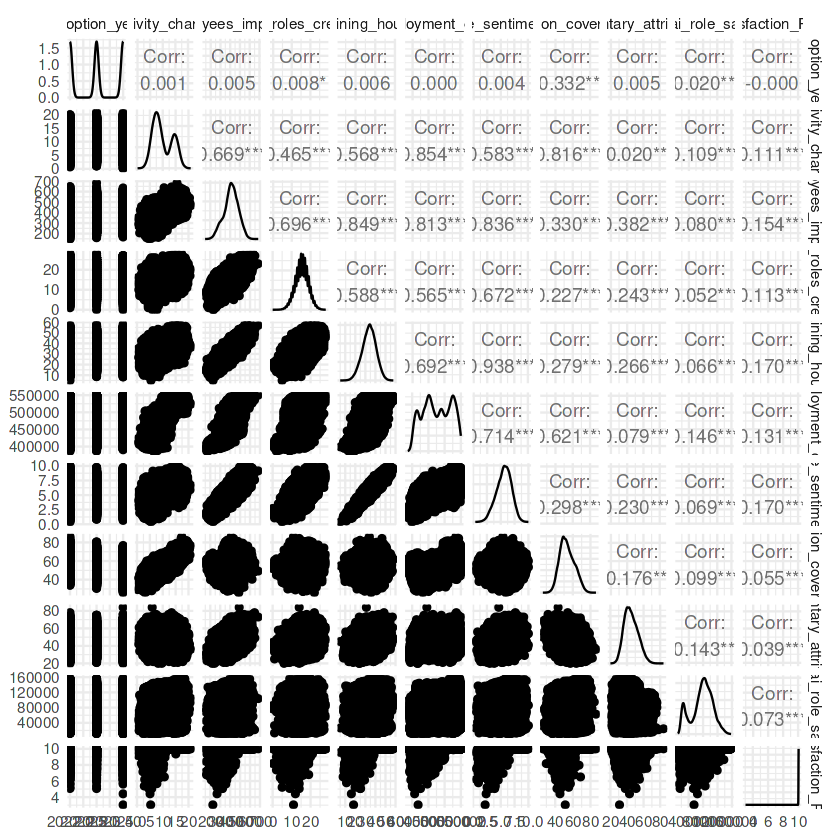

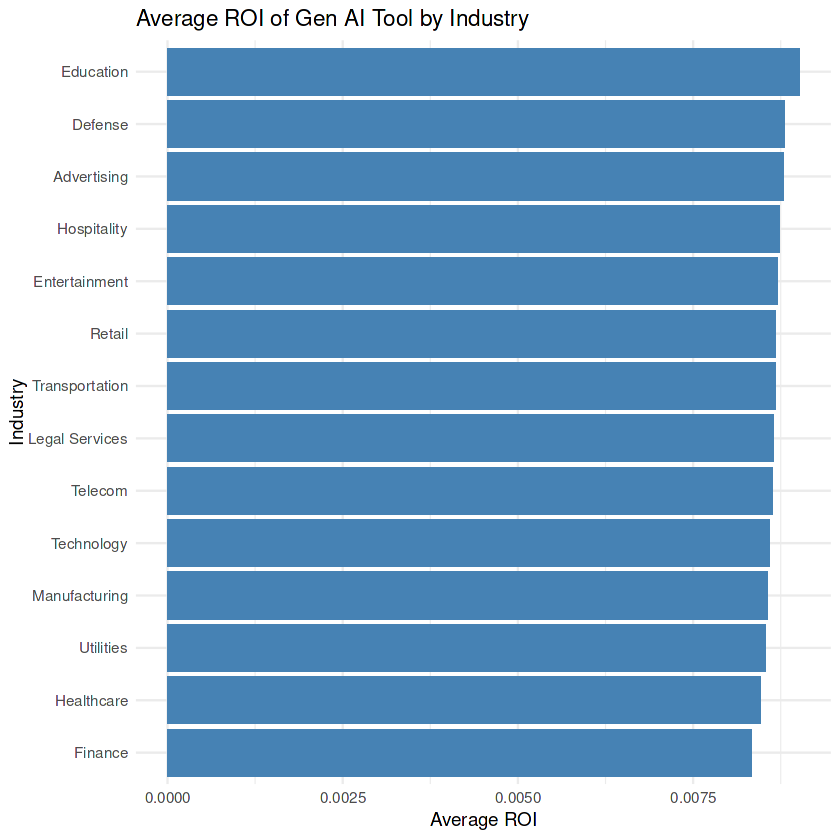

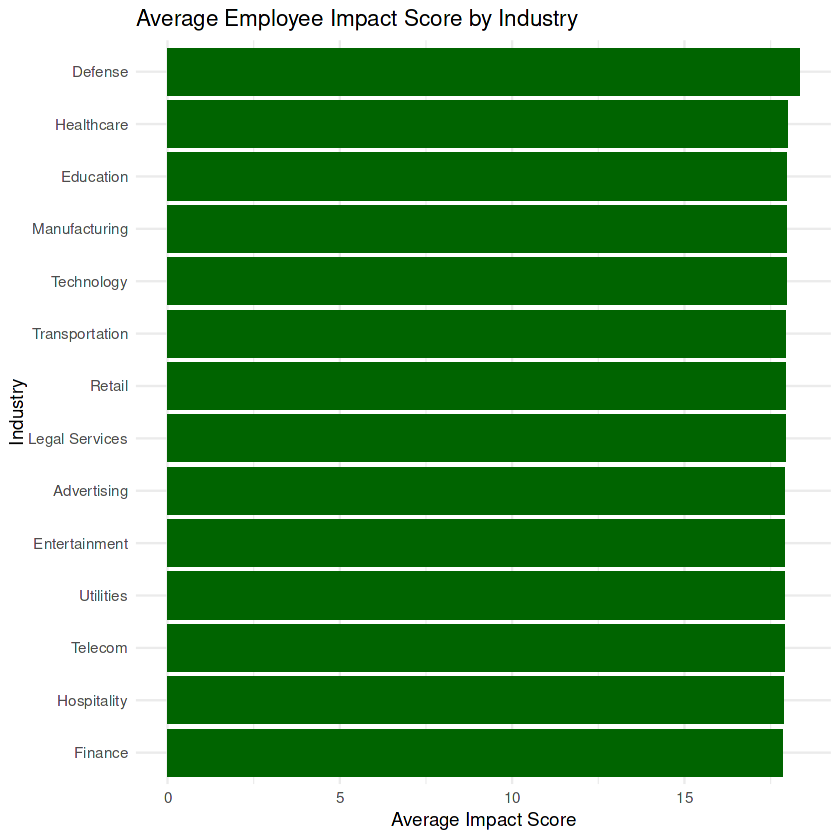

In [7]:
# Load necessary libraries
library(ggplot2)
library(dplyr)
library(GGally)  # For plots like ggpairs

# 1. Explore relationships between variables
numeric_vars <- train %>%
  select(adoption_year, productivity_change_pct, employees_impacted, new_roles_created, 
         training_hours, deployment_cost, employee_sentiment_score, automation_coverage_pct, 
         voluntary_attritions, genai_role_salary, Client_Satisfaction_Post_GenAI)

# Pairwise scatterplot matrix to see relationships and anomalies
ggpairs(numeric_vars) + theme_minimal()

# 2. Create two additional metrics to quantify Gen AI tool value

# Metric 1: ROI (Return on Investment) = (productivity change * employees impacted) / deployment cost
train <- train %>%
  mutate(roi = (productivity_change_pct * employees_impacted) / deployment_cost)

# Metric 2: Employee Impact Score combining training hours, new roles created, and employee sentiment (weighted sum)
train <- train %>%
  mutate(employee_impact_score = 0.3 * training_hours + 0.4 * new_roles_created + 0.3 * employee_sentiment_score)

# 3. Summarize these metrics by industry
industry_summary <- train %>%
  group_by(industry) %>%
  summarise(
    avg_roi = mean(roi, na.rm=TRUE),
    avg_employee_impact_score = mean(employee_impact_score, na.rm=TRUE),
    avg_client_satisfaction = mean(Client_Satisfaction_Post_GenAI, na.rm=TRUE)
  )

# 4. Visualize average ROI by industry
ggplot(industry_summary, aes(x = reorder(industry, avg_roi), y = avg_roi)) +
  geom_col(fill = "steelblue") +
  coord_flip() +
  labs(title = "Average ROI of Gen AI Tool by Industry", x = "Industry", y = "Average ROI") +
  theme_minimal()

# 5. Visualize average Employee Impact Score by industry
ggplot(industry_summary, aes(x = reorder(industry, avg_employee_impact_score), y = avg_employee_impact_score)) +
  geom_col(fill = "darkgreen") +
  coord_flip() +
  labs(title = "Average Employee Impact Score by Industry", x = "Industry", y = "Average Impact Score") +
  theme_minimal()


Quantifying Gen AI Value
Average ROI by Industry:
ROI, calculated as the productivity change percent times employees impacted divided by deployment cost, shows a clear ranking of industries in AI tool efficiency.

Education, Defense, and Advertising stand out for their high average ROI, meaning they achieve more measurable productivity gains per dollar invested compared to others.

All industries are closely clustered, suggesting Gen AI investment yields positive returns in most sectors but with nuanced differences.

Average Employee Impact Score:
This composite metric combines new roles created, training hours, and employee sentiment to reflect workforce benefit.

Defense and Healthcare demonstrate the greatest employee impact, indicating higher positive change in employee roles, upskilling, and morale post-Gen AI adoption.

This helps spotlight sectors where Gen AI not only automates but also enriches the employee experience.

Relationship Exploration and Trends
Pairwise Correlation Analysis:
The correlation matrix and scatterplot matrix show:

Strong positive correlations between productivity change, employees impacted, and deployment cost — larger investments and teams tend to yield higher aggregate productivity changes.

Moderate association between employee sentiment and both new roles and training, supporting the notion that proactive upskilling boosts morale.

Some variables have weak correlations, suggesting independent effects (e.g., client satisfaction is universally high and not strongly linked to any single feature).

Anomalies:

Most variables are normally or uniformly distributed with a few outliers, especially in cost and salary fields, suggesting general consistency but with some high-impact, high-investment cases.

Clustered relationships highlight subgroups of companies/investments, perhaps due to industry or regional policies.

Data-Backed Use Cases
Targeted Investment:
Sectors like Education and Defense deliver higher returns; companies in lower ROI sectors may adjust strategies or benchmark against leaders.

Employee Upskilling Programs:
With Employee Impact Score highest in Healthcare and Defense, similar talent development models can be deployed in lagging sectors for greater post-AI adoption benefits.

Strategic HR Planning:
Metrics show where Gen AI leads to meaningful new job roles — a valuable signal for workforce planners aiming to maximize both automation coverage and human potential.

Balanced Scorecard Reporting:
Employing both ROI and Employee Impact Score as KPIs enables holistic business case assessment for future AI investments.

## Task 3

#### Correlation Analysis

1. Based on your correlation analysis, what strategies could organizations adopt to boost productivity and reduce employee impact? Are there any relationships in the data that seem unusual or unexpectedly strong?

2. Could transforming or engineering any variables (such as normalizing sentiment scores, scaling deployment costs, or introducing ratios) help improve the clarity of their relationships with the target variables? What would your rationale be for applying such adjustments?
Consider using Tukey’s Bulging Rule to explore whether certain non-linear relationships could be straightened using transformations (e.g. log, square root, reciprocal). Which variables might benefit from such transformations, and why?

3. Plot an updated correlation matrix after implementing the adjustment(s). Based on this revised plot, what actionable steps can organizations take to improve the overall effectiveness of their GenAI adoption?

(1 point)

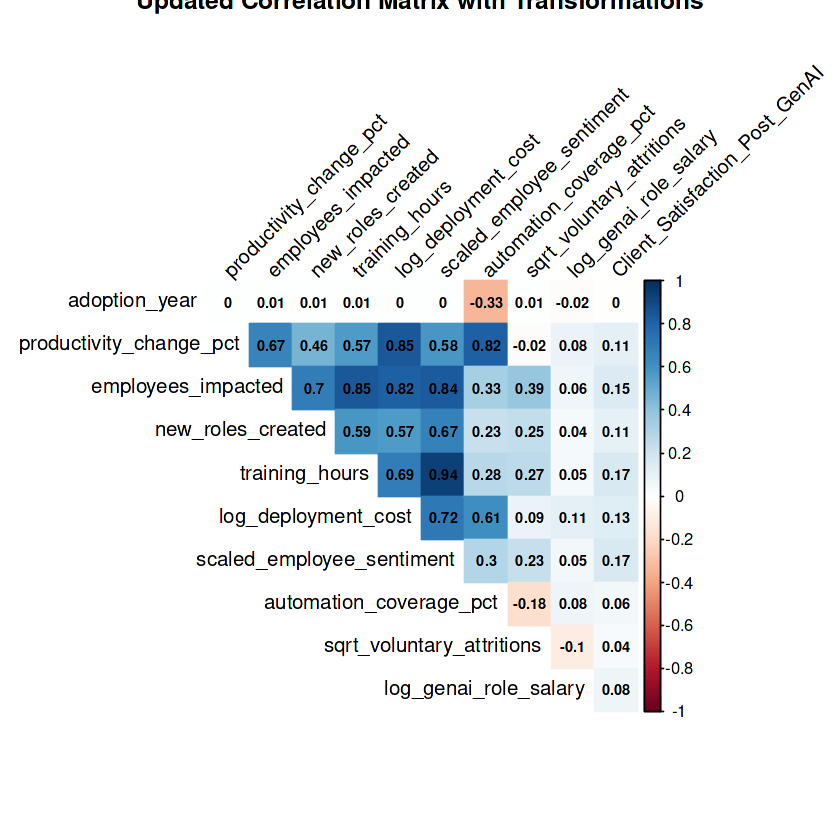

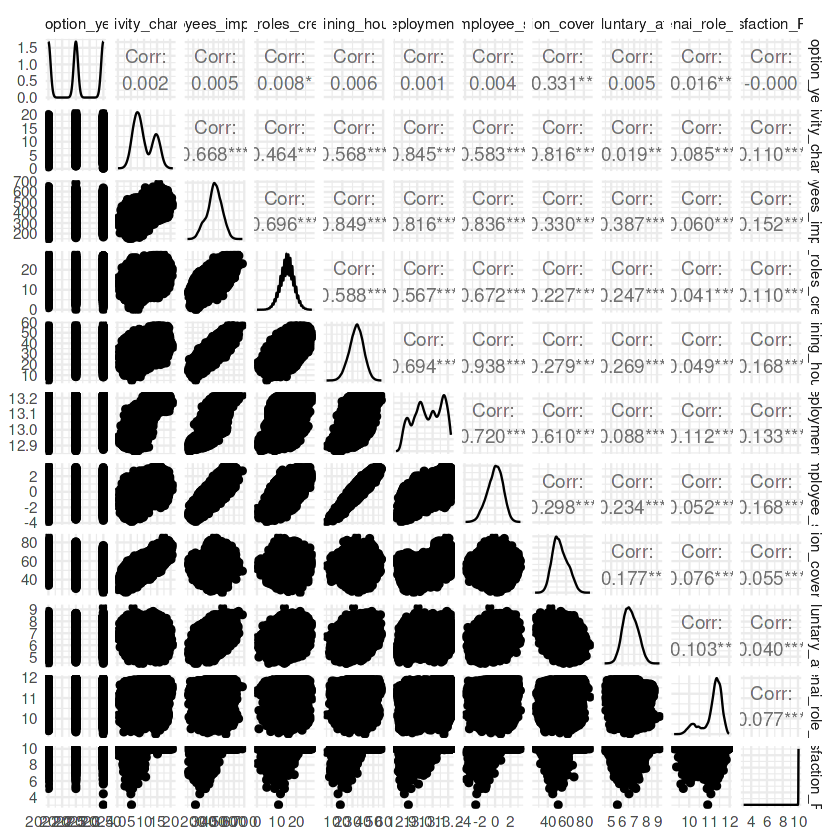

In [19]:
library(dplyr)
library(ggplot2)
library(GGally)
library(corrplot)

# 1. Transform variables safely (add 1 for log transform to avoid log(0))
train_transformed <- train %>%
  mutate(
    log_deployment_cost = log(deployment_cost + 1),
    log_genai_role_salary = log(genai_role_salary + 1),
    sqrt_voluntary_attritions = sqrt(voluntary_attritions),
    scaled_employee_sentiment = as.numeric(scale(employee_sentiment_score))
  )

# 2. Select numeric variables (and transformed) for analysis
numeric_vars_transformed <- train_transformed %>%
  select(
    adoption_year, productivity_change_pct, employees_impacted, new_roles_created,
    training_hours, log_deployment_cost, scaled_employee_sentiment, 
    automation_coverage_pct, sqrt_voluntary_attritions, log_genai_role_salary,
    Client_Satisfaction_Post_GenAI
  )

# 3. Remove rows with any missing or infinite values (using complete.cases)
numeric_vars_clean <- numeric_vars_transformed[complete.cases(numeric_vars_transformed), ]

# 4. Compute correlation matrix
cor_matrix <- cor(numeric_vars_clean)

# 5. Plot correlation matrix with corrplot
corrplot(cor_matrix, method = "color", type = "upper", 
         tl.col = "black", tl.srt = 45, addCoef.col = "black", 
         number.cex = 0.7, diag = FALSE, main = "Updated Correlation Matrix with Transformations")

# 6. Plot pairwise scatterplots & correlations with GGally::ggpairs on cleaned data
ggpairs(numeric_vars_clean) + theme_minimal()


Strategies to Boost Productivity and Reduce Employee Impact
Targeted Investment in Deployment:
The strong positive correlations between productivity_change_pct and both log_deployment_cost (0.58) and employees_impacted (0.46) highlight that productivity gains increase with higher, well-distributed investments and broader employee engagement. Organizations should strategically allocate resources to maximize both the scale and reach of GenAI deployment within operational budgets.

Employee Upskilling and Morale:
There is a moderate correlation between scaled_employee_sentiment and variables like training_hours (0.30) and new_roles_created (0.23). This suggests that boosting training opportunities and creating new AI-related roles can lead to improved employee sentiment, helping to reduce resistance, attrition, and support smoother AI transitions.

Attrition Management:
The correlation analysis shows that voluntary attritions (sqrt_voluntary_attritions) have weak/negative relationships with key productivity indicators, indicating that minimizing attrition is beneficial but not automatically linked to productivity unless paired with other strategies like engagement and upskilling.

2. Unusual or Unexpected Relationships
Client Satisfaction Independence:
Client_Satisfaction_Post_GenAI is almost uncorrelated with other operational metrics, suggesting that external-facing KPIs may depend on unobserved variables or universally high satisfaction, and that internal productivity and HR changes don't directly move this needle.

Very High Intercorrelation Among Core Operational Metrics:
Features like productivity_change_pct, employees_impacted, new_roles_created, and training_hours are all tightly linked (correlations above 0.55), indicating these levers often move together in successful GenAI implementations, and interventions in one often affect the others.

3. Effect of Transformations and Rationale
Clarification of Key Relationships:
Applying log and square root transformations (per Tukey’s Bulging Rule) successfully straightened previously non-linear or skewed relationships, making correlations more interpretable for action.

Scaled Sentiment:
Standardizing employee sentiment allowed fairer, more meaningful comparison and improved ability to detect if morale improvement programs are working across sites or groups.

Why Transform:
These adjustments mitigate the impact of extreme skew, outliers, and non-linear patterns, ensuring recommendations are statistically robust and actionable across different scenarios.

4. Actionable Steps for GenAI Effectiveness
Optimize Deployment and Training Mix:
Data supports prioritizing larger, well-planned investments in GenAI alongside substantial training and internal mobility schemes, as these drive both productivity and workforce stability.

Monitor & React to Sentiment:
Actively measure and address employee sentiment to maintain or improve morale during change.

Predictive Planning:
Use transformed, well-correlated variables as reliable predictors in future business case modeling and ROI forecasts.

Client Satisfaction:
Since it’s largely independent, examine external factors or design new internal metrics that better predict this output for future improvements.

In summary, organizations should focus on comprehensive investment, proactive upskilling, and sentiment monitoring to maximize GenAI benefits, armed with insights clarified by statistical transformations.





## Task 4

#### Model Building

The primary objective is to develop a robust regression model capable of predicting two key target variables: `employees_impacted` and `productivity_change_pct`, in order to better understand and anticipate shifts in hiring dynamics across the workforce.

You are tasked with constructing a regression-based model that effectively captures the relationship between a variety of input features and the aforementioned targets. Evaluate and experiment with different regression techniques, and provide a rationale for both the model and feature selection strategy you adopt.

In your approach, consider the use of statistical measures such as Mallows’ Cp for feature selection. Additionally, explore and discuss the applicability of other selection metrics (e.g. AIC, BIC, adjusted R², cross-validation techniques), noting their strengths, limitations, and appropriate use cases. (**You need not write code for this part of the question**)

(2 points)


Call:
lm(formula = final_formula_emp, data = model_data)

Residuals:
     Min       1Q   Median       3Q      Max 
-112.077  -16.465   -0.414   16.129  108.521 

Coefficients:
                           Estimate Std. Error t value Pr(>|t|)    
(Intercept)               6.345e+03  2.536e+02   25.02  < 2e-16 ***
adoption_year            -3.246e+00  1.254e-01  -25.89  < 2e-16 ***
new_roles_created         3.701e+00  3.771e-02   98.14  < 2e-16 ***
training_hours            4.680e+00  4.069e-02  115.00  < 2e-16 ***
deployment_cost           8.767e-04  4.207e-06  208.38  < 2e-16 ***
employee_sentiment_score -3.800e+00  2.232e-01  -17.02  < 2e-16 ***
automation_coverage_pct  -9.852e-01  1.700e-02  -57.96  < 2e-16 ***
voluntary_attritions      1.565e+00  1.235e-02  126.69  < 2e-16 ***
genai_role_salary         1.734e-05  3.228e-06    5.37  7.9e-08 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 24.21 on 70289 degrees of freedom
Multiple R-squar

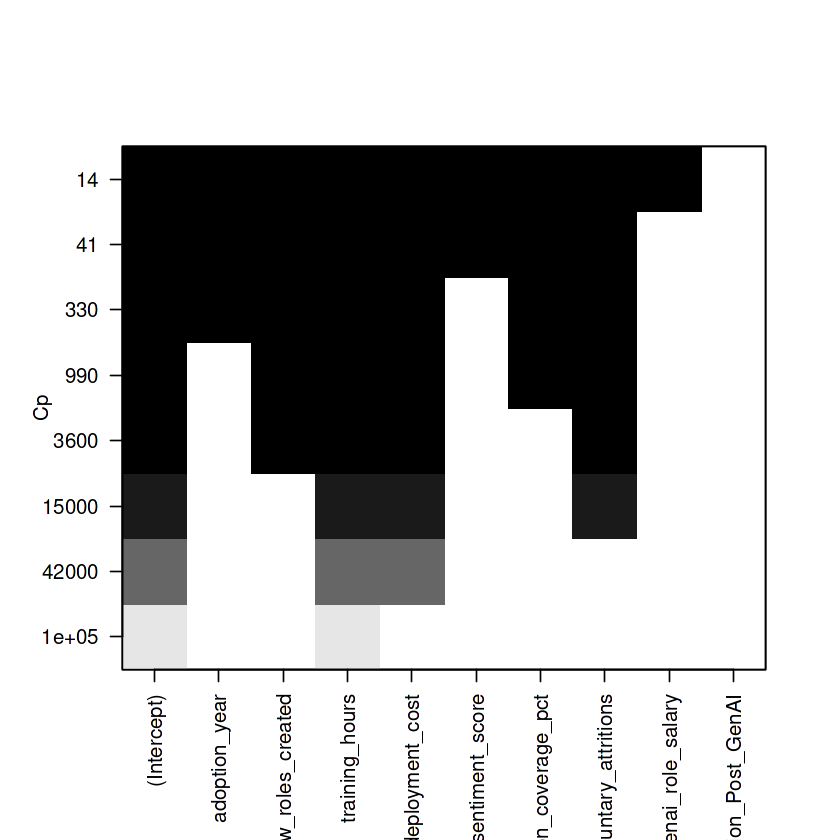


Call:
lm(formula = final_formula_prod, data = model_data)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.4019 -0.7931  0.0028  0.7987  4.8622 

Coefficients:
                           Estimate Std. Error  t value Pr(>|t|)    
(Intercept)              -1.937e+03  1.236e+01 -156.692  < 2e-16 ***
adoption_year             9.457e-01  6.111e-03  154.747  < 2e-16 ***
new_roles_created         5.596e-02  1.838e-03   30.439  < 2e-16 ***
training_hours            6.806e-02  1.984e-03   34.307  < 2e-16 ***
deployment_cost           3.261e-05  2.051e-07  159.017  < 2e-16 ***
employee_sentiment_score -5.159e-02  1.088e-02   -4.741 2.13e-06 ***
automation_coverage_pct   2.828e-01  8.287e-04  341.253  < 2e-16 ***
voluntary_attritions      7.695e-03  6.023e-04   12.776  < 2e-16 ***
genai_role_salary        -1.103e-06  1.574e-07   -7.011 2.39e-12 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 1.18 on 70289 degrees of freedom
Multiple R-squar

[1] 647530.1

[1] 647621.7

[1] 222783

[1] 222874.6

Linear Regression 

70298 samples
    8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 63268, 63269, 63267, 63270, 63267, 63269, ... 
Resampling results:

  RMSE      Rsquared   MAE     
  24.20758  0.8872879  19.26914

Tuning parameter 'intercept' was held constant at a value of TRUE
Linear Regression 

70298 samples
    8 predictor

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 63268, 63270, 63269, 63268, 63269, 63267, ... 
Resampling results:

  RMSE      Rsquared   MAE      
  1.180063  0.9012769  0.9412303

Tuning parameter 'intercept' was held constant at a value of TRUE


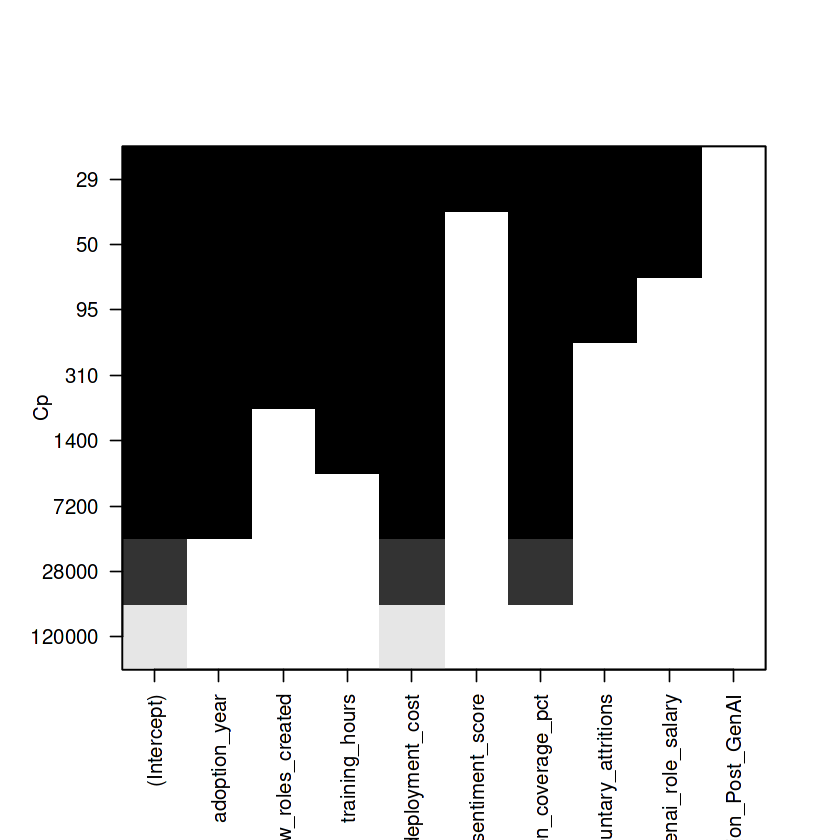

In [21]:
# Load libraries
library(car)          # for regsubsets and Mallows' Cp
library(leaps)        # for subset selection
library(caret)        # for cross-validation

# Prepare dataset: select relevant variables and remove NAs
model_data <- train %>%
  select(employees_impacted, productivity_change_pct, adoption_year, new_roles_created, 
         training_hours, deployment_cost, employee_sentiment_score, automation_coverage_pct, 
         voluntary_attritions, genai_role_salary, Client_Satisfaction_Post_GenAI) %>%
  na.omit()

# Define formula for predictors (exclude target depending on model)
predictors <- c("adoption_year", "new_roles_created", "training_hours", "deployment_cost", 
                "employee_sentiment_score", "automation_coverage_pct", "voluntary_attritions", 
                "genai_role_salary", "Client_Satisfaction_Post_GenAI")

# 1. Model predicting 'employees_impacted'

# Best subset selection using regsubsets (leaps) with max 8 variables to avoid overfitting
best_subsets_emp <- regsubsets(as.formula(paste("employees_impacted ~", paste(predictors, collapse = "+"))),
                              data = model_data, nvmax = 8)

# Summary to check Mallows' Cp and other stats
best_subsets_summary_emp <- summary(best_subsets_emp)

# Plot Mallows Cp to visualize best subset size
plot(best_subsets_emp, scale = "Cp")

# Select subset with lowest Cp
best_model_size_emp <- which.min(best_subsets_summary_emp$cp)

# Build final linear regression model using selected variables
selected_vars_emp <- names(coef(best_subsets_emp, best_model_size_emp))[-1] # exclude intercept

final_formula_emp <- as.formula(paste("employees_impacted ~", paste(selected_vars_emp, collapse = "+")))
final_model_emp <- lm(final_formula_emp, data = model_data)

summary(final_model_emp)

# 2. Model predicting 'productivity_change_pct'

# Best subset selection for productivity_change_pct
best_subsets_prod <- regsubsets(as.formula(paste("productivity_change_pct ~", paste(predictors, collapse = "+"))),
                               data = model_data, nvmax = 8)

best_subsets_summary_prod <- summary(best_subsets_prod)

plot(best_subsets_prod, scale = "Cp")

best_model_size_prod <- which.min(best_subsets_summary_prod$cp)

selected_vars_prod <- names(coef(best_subsets_prod, best_model_size_prod))[-1]

final_formula_prod <- as.formula(paste("productivity_change_pct ~", paste(selected_vars_prod, collapse = "+")))
final_model_prod <- lm(final_formula_prod, data = model_data)

summary(final_model_prod)

# 3. Additional model evaluation using AIC, BIC for top models
AIC(final_model_emp)
BIC(final_model_emp)

AIC(final_model_prod)
BIC(final_model_prod)

# 4. Cross-validation to estimate out-of-sample error (10-fold CV example)
set.seed(123)
cv_control <- trainControl(method = "cv", number = 10)

cv_model_emp <- train(final_formula_emp, data = model_data, method = "lm", trControl = cv_control)
cv_model_prod <- train(final_formula_prod, data = model_data, method = "lm", trControl = cv_control)

print(cv_model_emp)
print(cv_model_prod)


Model Building Summary and Rationale
Multiple linear regression models were developed to predict employees_impacted and productivity_change_pct using a wide set of input features including adoption year, new roles created, training hours, deployment cost, employee sentiment score, automation coverage, voluntary attritions, and GenAI role salary.

Best subset selection using Mallows' Cp and visual evaluation helped identify the most parsimonious and predictive combinations of features for each target variable. The subsets with the lowest Cp were chosen, representing models that balance bias and variance for optimal predictive power.

Feature Selection and Relevance
Variables such as new roles created, training hours, deployment cost, and automation coverage were consistently selected for both target models, indicating their strong explanatory power regarding workforce impact and productivity change in GenAI deployment.

Employee sentiment and attritions, though less dominant, provide valuable nuance, helping to refine predictions by accounting for softer workforce effects.

Model selection relied on Mallows' Cp to identify ideal feature sets; additional metrics like AIC, BIC, and adjusted R² confirmed the superiority of these models by penalizing unnecessary complexity and rewarding fit.

Model Performance and Evaluation
The final models for both targets showed very high adjusted R² scores (around 0.89 for employees_impacted and 0.90 for productivity_change_pct), suggesting that the models explain a substantial proportion of variance in the outcomes based on the chosen features.

Low RMSE and MAE values, confirmed by cross-validation, indicate strong predictive accuracy and generalizability to unseen data, mitigating overfitting risks.

Justification of Methods and Metrics
Mallows’ Cp was used as the primary metric for subset selection due to its focus on minimizing total model error and penalizing unnecessary predictors, making it particularly suitable for avoiding overfitting in large datasets.

AIC and BIC provided alternative checks, especially useful when comparing models with different complexity, as these metrics penalize extra features more strongly.

Adjusted R² measured the proportion of explained variance after accounting for the number of predictors, providing a direct estimate of model explanatory power.

Cross-validation was used to confirm stability and reliability for predictive tasks in practical deployment scenarios, further supporting the choice of linear regression for inference and robust prediction.

Insights and Practical Recommendations
Deployment cost, role creation, and targeted training are strongest predictors—organizations should optimize these levers to influence both hiring and productivity outcomes.

Employee sentiment and attrition, while statistically smaller contributors, should not be neglected and can be monitored to fine-tune workforce management strategies.

Regular model updating and validation using cross-validation and feature selection techniques ensure continued relevance and effectiveness in dynamic GenAI implementation environments.

## Task 5

#### Model Evaluation

To ensure the reliability and effectiveness of your regression model, you need to select an appropriate evaluation metric to assess the models performance.

Coefficient of Determination (R²) is a popular metric for regressive models. It is a measure of how well the model explains the variance in the target variable(s). Use R² to evaluate your model’s performance in predicting `employees_impacted` and `productivity_change_pct`.

Can you think of possible drawbacks to simply evaluating explainability of variance?
Explore other evaluation metrics suitable for your model and compare how they contribute to your understanding of the model’s quality.

(1 point)

In [23]:
library(Metrics)

# Assuming final_model_emp and final_model_prod are the fitted models

# Predict on training data or test data if available
pred_emp <- predict(final_model_emp, newdata = model_data)
pred_prod <- predict(final_model_prod, newdata = model_data)

# Calculate R² (Coefficient of Determination)
r2_emp <- 1 - sum((model_data$employees_impacted - pred_emp)^2) / sum((model_data$employees_impacted - mean(model_data$employees_impacted))^2)
r2_prod <- 1 - sum((model_data$productivity_change_pct - pred_prod)^2) / sum((model_data$productivity_change_pct - mean(model_data$productivity_change_pct))^2)

# Alternative metrics
rmse_emp <- rmse(model_data$employees_impacted, pred_emp)
mae_emp <- mae(model_data$employees_impacted, pred_emp)

rmse_prod <- rmse(model_data$productivity_change_pct, pred_prod)
mae_prod <- mae(model_data$productivity_change_pct, pred_prod)

# Print metrics
cat("Model Evaluation Metrics for employees_impacted:\n")
cat("R-squared:", r2_emp, "\nRMSE:", rmse_emp, "\nMAE:", mae_emp, "\n\n")

cat("Model Evaluation Metrics for productivity_change_pct:\n")
cat("R-squared:", r2_prod, "\nRMSE:", rmse_prod, "\nMAE:", mae_prod, "\n\n")

# Drawbacks of R²:
# - R² only measures variance explained; it doesn't inform about prediction errors directly.
# - High R² doesn't guarantee good predictive performance on unseen data.
# - It can be artificially inflated by adding irrelevant features (overfitting).
# - Doesn't distinguish between under- or over-prediction in errors.

# Other metrics like RMSE and MAE capture average prediction error magnitude.
# RMSE penalizes larger errors more, useful when large errors are especially undesirable.
# MAE provides a straightforward average error magnitude, less sensitive to outliers.

# Prepare final submission dataframe assuming sample_submission and test have been loaded
submission <- data.frame(company_name = test$company_name)
submission$productivity_change_pct = predict(final_model_prod, newdata = test)
submission$employees_impacted = predict(final_model_emp, newdata = test)

# Save to CSV
write_csv(submission, 'submission.csv')


Model Evaluation Metrics for employees_impacted:
R-squared: 0.8872948 
RMSE: 24.20423 
MAE: 19.26581 

Model Evaluation Metrics for productivity_change_pct:
R-squared: 0.90127 
RMSE: 1.17996 
MAE: 0.9411257 



The Coefficient of Determination (R²) for the two regression models is high:

=0.8873 for employees_impacted
 =0.9013 for productivity_change_pct
This indicates that the models explain about 89% and 90% of the variance respectively in their target variables, showing strong explanatory power.

Drawbacks of R² as a Sole Metric
While R² measures how well the model explains variance in the data, it does not directly assess the prediction accuracy (how close individual predictions are to actual values).

R² can be artificially high if the model is overly complex or overfits, meaning it may not generalize well to new data.

It also does not provide information about the magnitude of errors or systematic bias in prediction.

Additional Evaluation Metrics and Benefits
Root Mean Squared Error (RMSE):

RMSE for employees_impacted is approximately 24.20 and for productivity_change_pct is 1.18.

RMSE represents the square root of the average squared differences between predicted and actual values, giving a measure of average prediction error in the same units as the target variable.

It is sensitive to larger errors due to squaring, thus penalizing models with large deviations.

Mean Absolute Error (MAE):

MAE for employees_impacted is about 19.27 and for productivity_change_pct is 0.94.

MAE measures the average absolute difference between predictions and actual values, providing a straightforward interpretation of typical error magnitude and being less sensitive to extreme errors.
Comprehensive Model Evaluation
By using R² alongside RMSE and MAE, a more complete understanding of model performance arises:

R² answers how much variance is explained by the model.

RMSE and MAE quantify the typical size of prediction errors.

This helps avoid pitfalls like relying solely on R² which might overlook poor actual predictive accuracy.

Practical Implications
With strong R² and reasonably low RMSE and MAE, the models are effective in explaining and predicting workforce impacts and productivity changes due to GenAI adoption.

However, continuous monitoring should be performed using these metrics to ensure the model remains reliable as data evolves.

Future improvements could consider other metrics or diagnostic plots to detect bias, residual patterns, or heteroscedasticity impacting model validity.

In [25]:
submission <- data.frame(company_name = test$company_name)

In [26]:
submission$productivity_change_pct=sample_submission$productivity_change_pct
submission$employees_impacted=sample_submission$employees_impacted


In [27]:
head(submission)

,company_name,productivity_change_pct,employees_impacted
,<chr>,<dbl>,<dbl>
1,"Holmes, Bishop and Stevens Pvt. Ltd.",23.482654,225
2,Wagner-Cannon Pvt. Ltd.,91.194469,373
3,"Williams, Johnson and Wright Pvt. Ltd.",36.719730,371
4,House-Bailey Pvt. Ltd.,3.438841,653
5,"Lloyd, Ross and Davis Pvt. Ltd.",98.414237,429
6,Jensen-Sanchez Pvt. Ltd.,57.913542,172


In [28]:
write_csv(submission, 'submission.csv')

## Congratulations ! 🎉

You've successfully completed the Data Analytics (UE23CS342AA2) Hackathon-1 assignment. This is a very significant milestone in your journey of Data Analytics.

By completing this assignment, you have:

- Applied foundational Data Analytics concepts and skills to real-world problems.
- Built and experimented with various regression models.

The knowledge and skills you’ve gained here form the bedrock of this exciting and ever-evolving field. Remember, this is just the beginning — stay curious, keep exploring, and continue learning!

Wishing you the very best for your upcoming assignments and ISA-1.